### Задание 1 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

%config InlineBackend.figure.format='svg'
%matplotlib inline

In [19]:
from sklearn.datasets import load_boston

In [20]:
boston = load_boston()

In [21]:
data = boston.data

In [22]:
feature_names = boston.feature_names

In [23]:
x = pd.DataFrame(data, columns=feature_names)

In [24]:
y = boston.target

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
scaler=StandardScaler()

In [27]:
x_train_scaled = scaler.fit_transform(x_train)

In [28]:
x_test_scaled = scaler.transform(x_test)

In [29]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names)

In [30]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

In [31]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [32]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

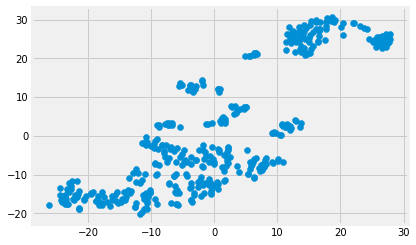

In [33]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1])

### Задание 2 

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [36]:
labels_train = kmeans.fit_predict(x_train_scaled)

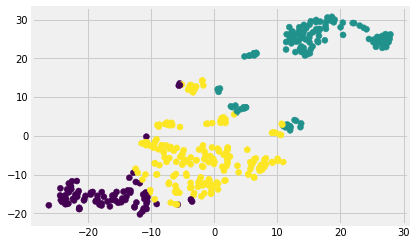

In [39]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=labels_train)

In [41]:
y_train[labels_train==0].mean()

27.78837209302326

In [42]:
y_train[labels_train==1].mean()

16.165354330708663

In [43]:
y_train[labels_train==2].mean()

24.958115183246072

In [46]:
x_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [47]:
x_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [48]:
x_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

### Задание 3

In [49]:
labels_test = kmeans.predict(x_test_scaled)

In [50]:
y_test[labels_test==0].mean()

31.35

In [51]:
y_test[labels_test==1].mean()

16.43714285714286

In [53]:
y_test[labels_test==2].mean()

21.860784313725492

In [54]:
x_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [55]:
x_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [56]:
x_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176